<a href="https://colab.research.google.com/github/Svhugani/QOptics/blob/main/HEPLEPNUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qutip

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

In [12]:

class QuantumSystem:

  def __init__( self, isBalanced, omega, gamma_1, gamma_3, gSpace, dim):
    
    self.isBalanced = isBalanced
    self.omega = omega
    self.gamma_1 = gamma_1
    self.gamma_3 = gamma_3
    self.dim = dim
    self.gSpace = gSpace

  def SystemMatrix(self, g):
    I = qt.identity(self.dim)
    a1 = qt.tensor(qt.destroy(self.dim),I,I)
    a2 = qt.tensor(I,qt.destroy(self.dim),I)
    a3 = qt.tensor(I,I,qt.destroy(self.dim))

    H = self.omega * (a1.dag() * a1 + a2.dag() * a2 + a3.dag() * a3) + g * (a1.dag() * a2 + a2.dag() * a1 + a2.dag() * a3 + a3.dag() * a2 )
    L = -1.0j * (qt.spre(H) - qt.spost(H))

    if self.isBalanced:
      L += self.gamma_1 * qt.lindblad_dissipator(a1)
      L += self.gamma_1 * qt.lindblad_dissipator(a3.dag())
    
    else:
      L += self.gamma_1 * qt.lindblad_dissipator(a1)
      L += self.gamma_3 * qt.lindblad_dissipator(a3)

    return [H, L]

  def PlotSystemOfGspace(self, isHamiltionian, isRealPart):
    
    Energies = []

    if isHamiltionian:
      refInd = 0
    else:
      refInd = 1
    
    for gPoint in self.gSpace:
      system = self.SystemMatrix(gPoint)
      Energies.append(system[refInd].eigenenergies())
    
    Energies = np.array(Energies)

    if isRealPart:
      title = "Real"
      Energies = np.real(Energies)
    
    else:
      title = "Imaginary"
      Energies = np.imag(Energies)

    plt.subplots(figsize=(15,10))
    
    for i in range(len(Energies[0])):
      Y = Energies[ : , i ]
      plt.plot(self.gSpace, Y, label = "eig " + str(i), linestyle = "solid", linewidth = 3)

    plt.legend()
    plt.title(str(title) + " parts of eigenvalues versus g / omega")
    plt.grid()
    plt.show()



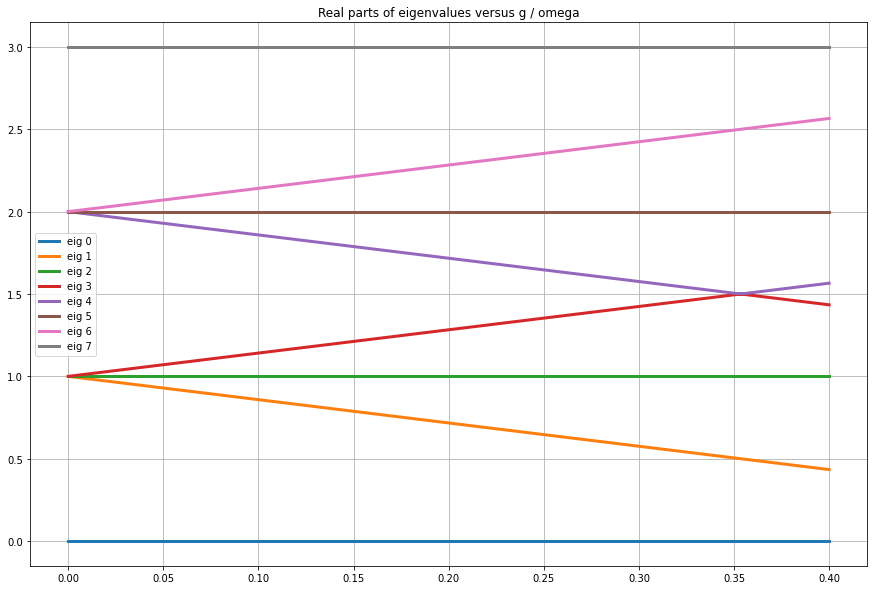

In [22]:
isBalanced = True
isHamiltonian = True
isRealPart = True
subsystemDim = 2

QS = QuantumSystem(isBalanced, 1, 1, 0.5, np.linspace(0, 0.4, 100), subsystemDim)
QS.PlotSystemOfGspace(isHamiltonian, isRealPart)